# PCA 

we will perform a simple PCA. then show the impact of PCA in classification

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler




digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
X = digits.data
y = digits.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

(1797, 64)

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_pca.shape

(1797, 2)

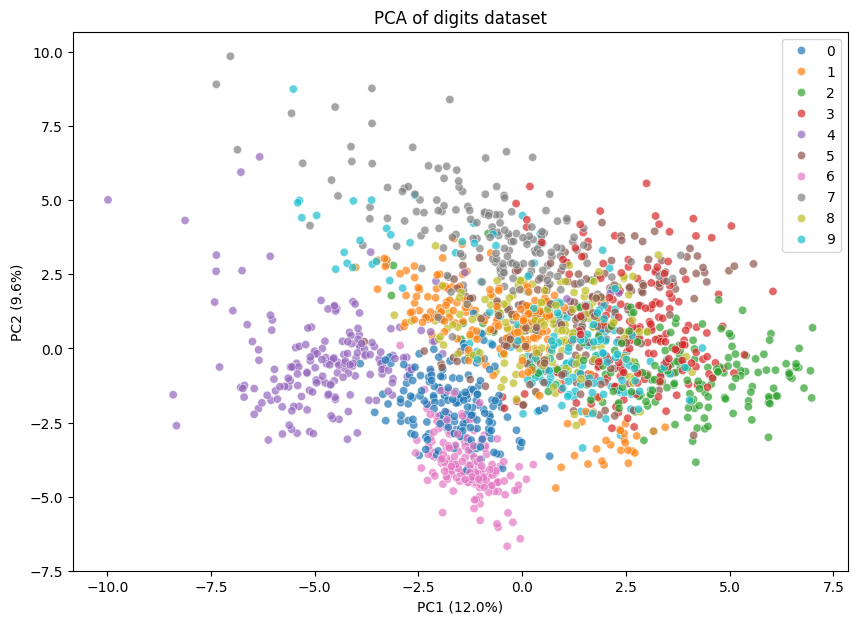

In [20]:
plt.figure(figsize=(10, 7))

p = sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="tab10", alpha=0.7)
_ = p.set(
    title="PCA of digits dataset",
    xlabel=f"PC1 ({pca.explained_variance_ratio_[0]:.1%})",
    ylabel=f"PC2 ({pca.explained_variance_ratio_[1]:.1%})",
)

## Described Variablity


Text(0, 0.5, 'Total variablity explained (%)')

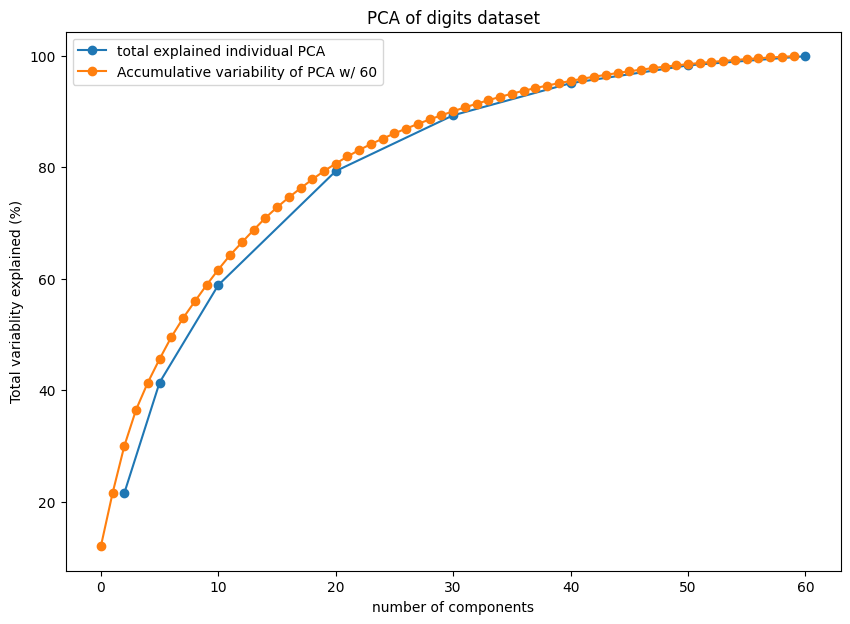

In [ ]:
components = [2, 5, 10, 20, 30, 40, 50, 60]

variability = []

X_pca = {}

for n_c in components:
    pca = PCA(n_components=n_c)
    X_pca[n_c] = pca.fit_transform(X_scaled)

    variability += [sum(pca.explained_variance_ratio_) * 100]

variability_n60 = pca.explained_variance_ratio_


plt.figure(figsize=(10, 7))
plt.plot(components, variability, marker="o", label="total explained individual PCA")
plt.plot(
    range(len(variability_n60)),
    np.cumsum(variability_n60 * 100),
    marker="o",
    label=f"Accumulative variability of PCA w/ {components[-1]}",
)
plt.title("PCA of digits dataset")
plt.xlabel("number of components")
plt.legend()
plt.ylabel("Total variablity explained (%)")

Note: Variability explained by using only 10 components is similar but not equal to variability of 10 fist components of a PCA with 60 components. 

but all the component itself are exactly the same:

In [ ]:

for i, c1 in enumerate(components):
    for c2 in components[(i+1):]:
        print(f'\ncomparing {c1} {c2}')
        for i in range(X_pca[c1].shape[1]):
            r = np.array_equal(X_pca[c1][:, i], X_pca[c2][:, i])
            print(f'c[{i}]={r} ', end='')



comparing 2 5
c[0]=True c[1]=True 
comparing 2 10
c[0]=True c[1]=True 
comparing 2 20
c[0]=True c[1]=True 
comparing 2 30
c[0]=True c[1]=True 
comparing 2 40
c[0]=True c[1]=True 
comparing 2 50
c[0]=True c[1]=True 
comparing 2 60
c[0]=True c[1]=True 
comparing 5 10
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 5 20
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 5 30
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 5 40
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 5 50
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 5 60
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True 
comparing 10 20
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True c[5]=True c[6]=True c[7]=True c[8]=True c[9]=True 
comparing 10 30
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True c[5]=True c[6]=True c[7]=True c[8]=True c[9]=True 
comparing 10 40
c[0]=True c[1]=True c[2]=True c[3]=True c[4]=True c[5]=True c[6]=True c[7]=True c[8]=True c[9]=True 
c

In [48]:
## Programming excercise: Calculate cumsum:

a = np.random.randint(1, 10, size=20)
def cumsum(A):
    p = A.copy()
    for i in range(1, len(p)):
        p[i] += p[i-1]
    return p
    
print(a)
print(cumsum(a))
print(np.cumsum(a))

[3 5 4 9 7 2 7 1 4 1 9 9 6 2 1 5 4 4 1 1]
[ 3  8 12 21 28 30 37 38 42 43 52 61 67 69 70 75 79 83 84 85]
[ 3  8 12 21 28 30 37 38 42 43 52 61 67 69 70 75 79 83 84 85]


## Modeling results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train,  X_test,y_train, y_test = train_test_split(X_scaled, y, test_size=.2, random_state=42)

print(X_train.shape, X_test.shape) 


(1437, 64) (360, 64)


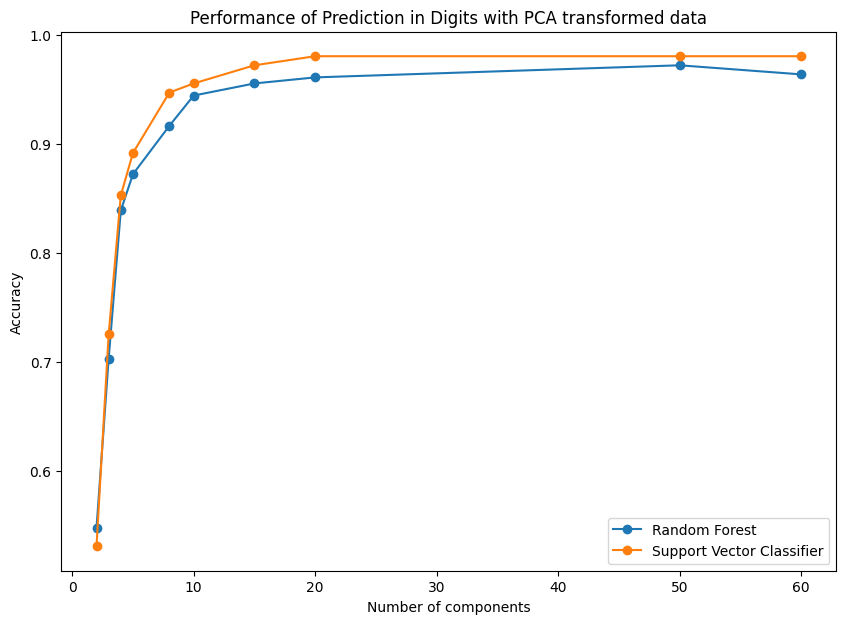

In [70]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

components = [2, 3, 4, 5, 8, 10, 15, 20, 50, 60]


pca = PCA(n_components=components[-1])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

rf = RandomForestClassifier()
svc = SVC()
results = []

for n_c in components:

    X_train_pca_c = X_train_pca[:, :n_c]
    X_test_pca_c = X_test_pca[:, :n_c]

    rf.fit(X_train_pca_c, y_train)
    y_pred_rf = rf.predict(X_test_pca_c)

    svc.fit(X_train_pca_c, y_train)
    y_pred_svc = svc.predict(X_test_pca_c)

    results += [
        [
            n_c,
            accuracy_score(y_test, y_pred_rf),
            accuracy_score(y_test, y_pred_svc),
        ]
    ]

results = pd.DataFrame(results, columns=["n_c", "rf_acc", "svc_acc"])

plt.figure(figsize=(10, 7))
plt.plot(results["n_c"], results["rf_acc"], marker="o", label="Random Forest")
plt.plot(
    results["n_c"], results["svc_acc"], marker="o", label="Support Vector Classifier"
)
plt.xlabel("Number of components")
plt.ylabel("Accuracy")
plt.title("Performance of Prediction in Digits with PCA transformed data")
plt.legend()